<a href="https://colab.research.google.com/github/winstonwwwww/Pokedex-Webscraping/blob/main/pokedex_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# 1. Web Scraping
response = requests.get("https://pokemondb.net/pokedex/all")
soup = BeautifulSoup(response.content, "html.parser")

# Extract Pokemon data from the HTML table
table = soup.find("table", {"id": "pokedex"})
rows = table.find_all('tr')

# Create a dataframe with the extracted data
columns = [td.text.strip() for td in rows[0].find_all('th')]
columns[0] = "Number"

r = []
for value in rows[1:]:  # Start from index 1 to skip the header row
    row_data = [td.text.strip() for td in value.find_all('td')]
    r.append(row_data)

pokemon = pd.DataFrame(data=r, columns=columns)

# Since some Pokémon have two types, split the 'Type' column into 'Type 1' and 'Type 2.' and drop the original 'Type' column
# If a Pokémon has only one type, fill the 'Type 2' column with 'NA.'
split_types = pokemon['Type'].str.split(' ', n=1, expand=True)
pokemon.insert(2, 'Type 1', split_types[0])
pokemon.insert(3, 'Type 2', split_types[1].fillna(value=pd.NA))
pokemon.drop(columns=['Type'], inplace=True)
pokemon.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0001,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,0002,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,0003,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,0003,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,0004,Charmander,Fire,<NA>,309,39,52,43,60,50,65


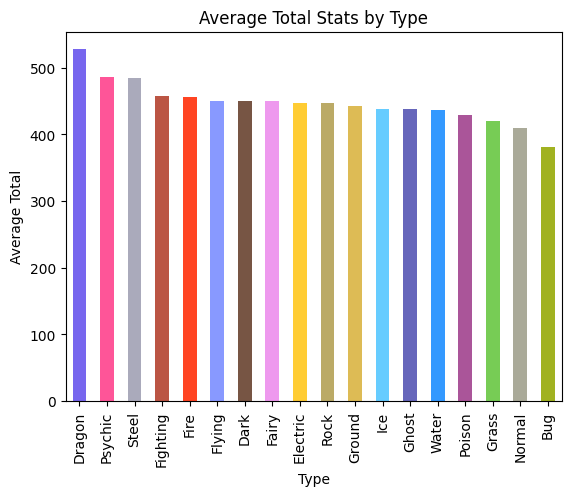

In [223]:
# 2. Data Analysis and Visualization

# Color code for Pokemon types
color_code = {
    'Normal': '#aaaa99',
    'Fire': '#ff4422',
    'Water': '#3399ff',
    'Electric': '#ffcc33',
    'Grass': '#77cc55',
    'Ice': '#66ccff',
    'Fighting': '#bb5544',
    'Poison': '#aa5599',
    'Ground': '#ddbb55',
    'Flying': '#8899ff',
    'Psychic': '#fe5598',
    'Bug': '#a1b221',
    'Rock': '#bbaa66',
    'Ghost': '#6666bb',
    'Dragon': '#7766ee',
    'Dark': '#775544',
    'Steel': '#aaaabb',
    'Fairy': '#ee99ee'
}

# Create Bar chart for average Total stats by Pokemon Types
pokemon['Total'] = pd.to_numeric(pokemon['Total'])  #Convert the 'Total' column to numeric data type

avg_stats = pokemon.groupby('Type 1')['Total'].mean().sort_values(ascending=False)
avg_stats.plot(kind='bar', color=[color_code.get(type) for type in avg_stats.index])

plt.xlabel('Type')
plt.ylabel('Average Total')
plt.title('Average Total Stats by Type')
plt.show()

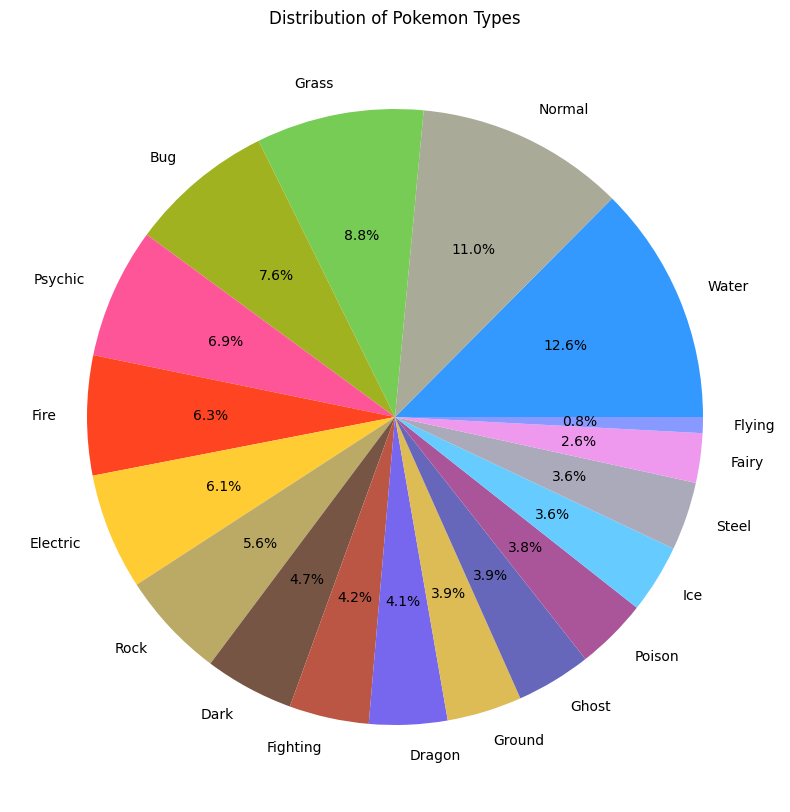

In [221]:
# Create Pie chart for the distribution of Pokemon types
pokemon_count = pokemon['Type 1'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(pokemon_count, labels=pokemon_count.index, autopct='%1.1f%%', colors=[color_code.get(type, '#1f77b4') for type in pokemon_count.index])
plt.title('Distribution of Pokemon Types')
plt.show()

In [220]:
# 3. Conclusion
# The analysis reveals that Dragon-type Pokémon have the highest total stats, while Bug-type Pokémon have the lowest.
# Water-type Pokémon are the most common, constituting 12.6% of all Pokémon, while Flying-type Pokémon only make up 0.8%, the lowest.

#If you want to conduct further analysis on your own, you can export the DataFrame to a CSV file named 'pokemon_data.csv' using the following code:
pokemon.to_csv('pokemon_data.csv', index=False)